# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the data

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Internship/Time series/GlobalLandTemperaturesByMajorCity.csv")

#### Basic Checks

In [4]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
data.shape

(239177, 7)

In [6]:
temp_data=data[data.City=='Bangalore']

In [7]:
temp_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
17335,1796-01-01,22.672,2.317,Bangalore,India,12.05N,77.26E
17336,1796-02-01,24.420,1.419,Bangalore,India,12.05N,77.26E
17337,1796-03-01,26.092,2.459,Bangalore,India,12.05N,77.26E
17338,1796-04-01,27.687,1.746,Bangalore,India,12.05N,77.26E
17339,1796-05-01,27.619,1.277,Bangalore,India,12.05N,77.26E
...,...,...,...,...,...,...,...
19943,2013-05-01,29.189,0.514,Bangalore,India,12.05N,77.26E
19944,2013-06-01,25.835,0.384,Bangalore,India,12.05N,77.26E
19945,2013-07-01,25.008,0.416,Bangalore,India,12.05N,77.26E
19946,2013-08-01,25.236,0.520,Bangalore,India,12.05N,77.26E


In [8]:
temp_data=temp_data.dropna()

In [9]:
temp_data.index=pd.to_datetime(temp_data.dt)

In [10]:
temp_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,,
1796-01-01,1796-01-01,22.672,2.317,Bangalore,India,12.05N,77.26E
1796-02-01,1796-02-01,24.420,1.419,Bangalore,India,12.05N,77.26E
1796-03-01,1796-03-01,26.092,2.459,Bangalore,India,12.05N,77.26E
1796-04-01,1796-04-01,27.687,1.746,Bangalore,India,12.05N,77.26E
1796-05-01,1796-05-01,27.619,1.277,Bangalore,India,12.05N,77.26E
...,...,...,...,...,...,...,...
2013-04-01,2013-04-01,29.593,0.435,Bangalore,India,12.05N,77.26E
2013-05-01,2013-05-01,29.189,0.514,Bangalore,India,12.05N,77.26E
2013-06-01,2013-06-01,25.835,0.384,Bangalore,India,12.05N,77.26E


#### Droping all columns except Average temparature

In [11]:
temp_data=temp_data.drop(['dt', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],axis=1)

In [12]:
temp_data.describe()

,AverageTemperature
count,2508.000000
mean,24.855896
std,1.866839
min,20.257000
25%,23.511250
50%,24.556500
75%,26.173500
max,29.688000


In [13]:
ts=temp_data['AverageTemperature']
ts

dt
1796-01-01    22.672
1796-02-01    24.420
1796-03-01    26.092
1796-04-01    27.687
1796-05-01    27.619
               ...  
2013-04-01    29.593
2013-05-01    29.189
2013-06-01    25.835
2013-07-01    25.008
2013-08-01    25.236
Name: AverageTemperature, Length: 2508, dtype: float64

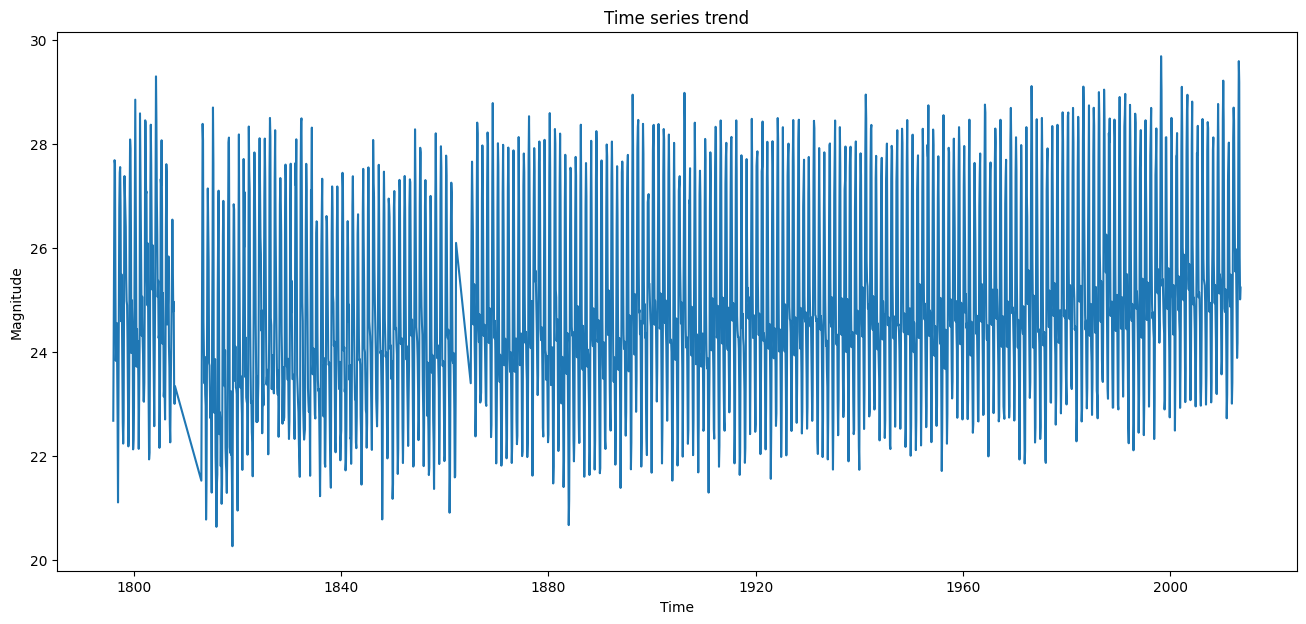

In [14]:
#checking the trend of original data


plt.figure(figsize=(16,7))
plt.xlabel("Time")
plt.ylabel('Magnitude')
plt.title('Time series trend')
plt.plot(ts)
plt.show()

In [15]:
# Conducting Dicky fuller test to check the stationarity of the data


from statsmodels.tsa.stattools import adfuller
# Null hypothese is data is not stationary
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Statistic: -3.6089203520342568
p-value: 0.005592761988031911
Critical Values: {'1%': -3.4329895489772104, '5%': -2.8627061345839557, '10%': -2.5673907792989072}
Reject the null hypothesis. Data is stationary.


# Implimenting the ARMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 2508
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3399.765
Date:                Thu, 24 Aug 2023   AIC                           6809.531
Time:                        09:54:26   BIC                           6838.667
Sample:                             0   HQIC                          6820.107
                               - 2508                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8551      0.043    578.553      0.000      24.771      24.939
ar.L1          1.2490      0.024     52.010      0.000       1.202       1.296
ar.L2         -0.6780      0.019    -34.978      0.0

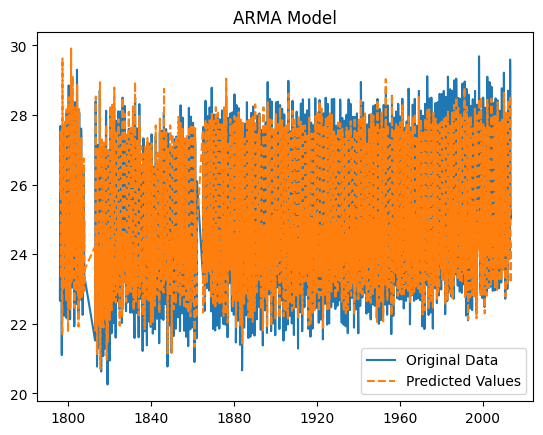

In [16]:
from statsmodels.tsa.arima.model import ARIMA
# Specify ARMA(p, q) model order
p = 2  # Autoregressive order
q = 1  # Moving average order

# Fit ARMA model
model = ARIMA(ts, order=(p, 0, q))  # Setting d to 0 for ARMA
results = model.fit()

# Print model summary
print(results.summary())

# Get predicted values
predicted_values = results.predict(start=p, end=len(ts) - 1)

# Plot the original data and predicted values
plt.plot(ts, label='Original Data')
plt.plot(predicted_values, label='Predicted Values', linestyle='dashed')
plt.legend()
plt.title('ARMA Model')
plt.show()

# Implimenting the ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 2508
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3953.954
Date:                Thu, 24 Aug 2023   AIC                           7913.908
Time:                        09:54:26   BIC                           7931.388
Sample:                             0   HQIC                          7920.253
                               - 2508                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2442      0.041      5.940      0.000       0.164       0.325
ma.L1          0.3072      0.039      7.949      0.000       0.231       0.383
sigma2         1.3721      0.035     39.302      0.0

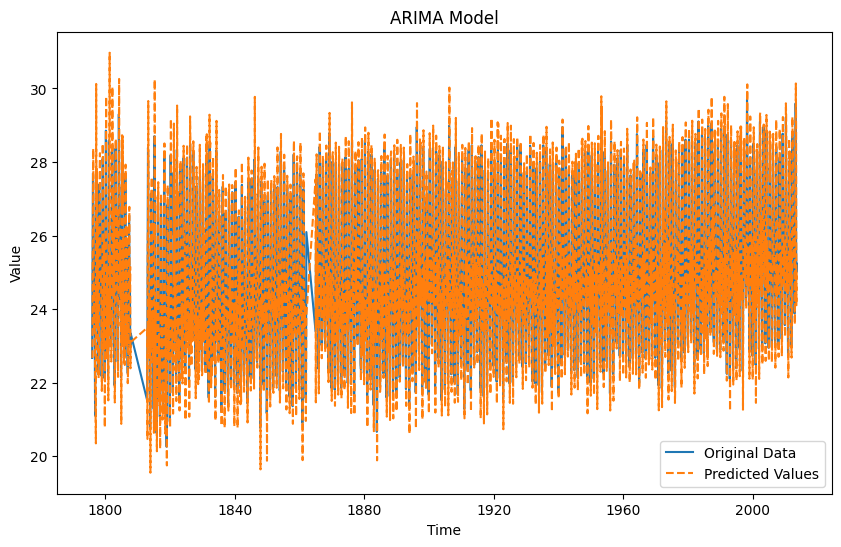

In [17]:
# Define the ARIMA(p, d, q) model order
p = 1  # Autoregressive order
d = 1  # Integrated order (differencing)
q = 1  # Moving average order

# Fit ARIMA model
model = ARIMA(ts, order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

# Get predicted values
predicted_values = results.predict(start=d, end=len(ts) - 1, typ='levels')

# Plot the original data and predicted values
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.plot(predicted_values, label='Predicted Values', linestyle='dashed')
plt.legend()
plt.title('ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()